In [1]:
import matplotlib.pyplot as plt

import lecture3.training_data as td
from lecture3.model import MakemoreModel

%matplotlib inline

In [2]:
print("training examples:", len(td.Y_train))
print("dev examples:", len(td.Y_dev))
print("test examples:", len(td.Y_test))
print("Total parameters:", sum([param.numel() for param in MakemoreModel().params]))


training examples: 182546
dev examples: 22840
test examples: 22760
Total parameters: 8108


Training Initial model...
Initial model Loss after 5000 rounds: 2.4139087200164795
Training Less overconfident model...
Less overconfident model Loss after 5000 rounds: 2.3362672328948975
Training Desaturated tanh model...
Desaturated tanh model Loss after 5000 rounds: 2.3583500385284424
Training Final model...
Final model Loss after 5000 rounds: 2.3203284740448


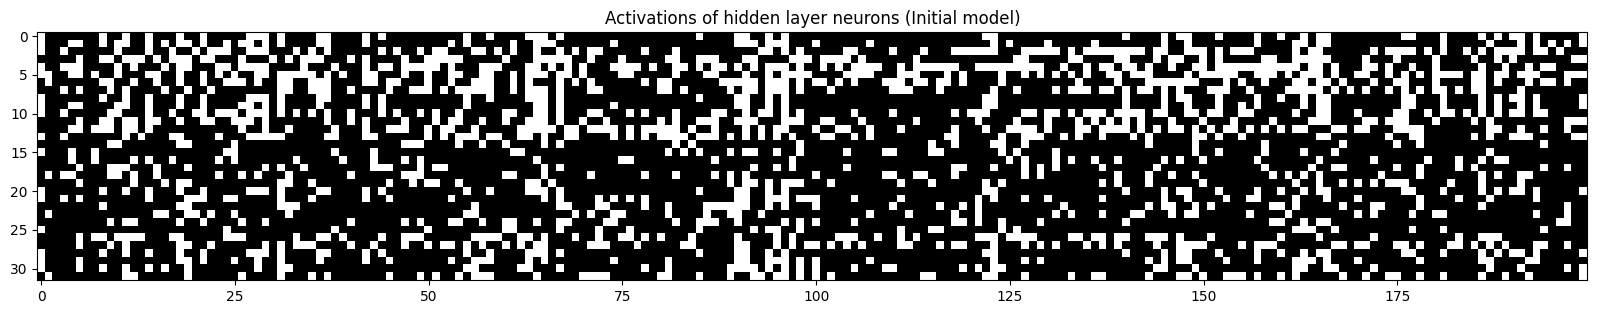

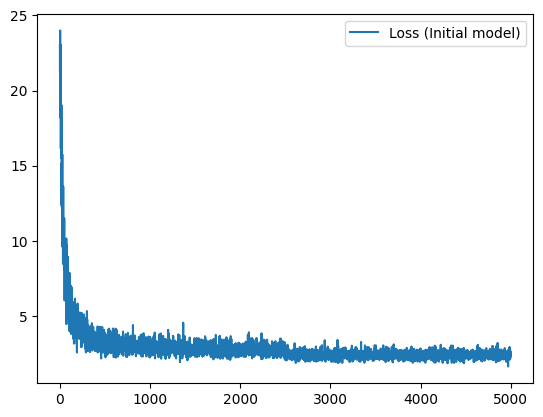

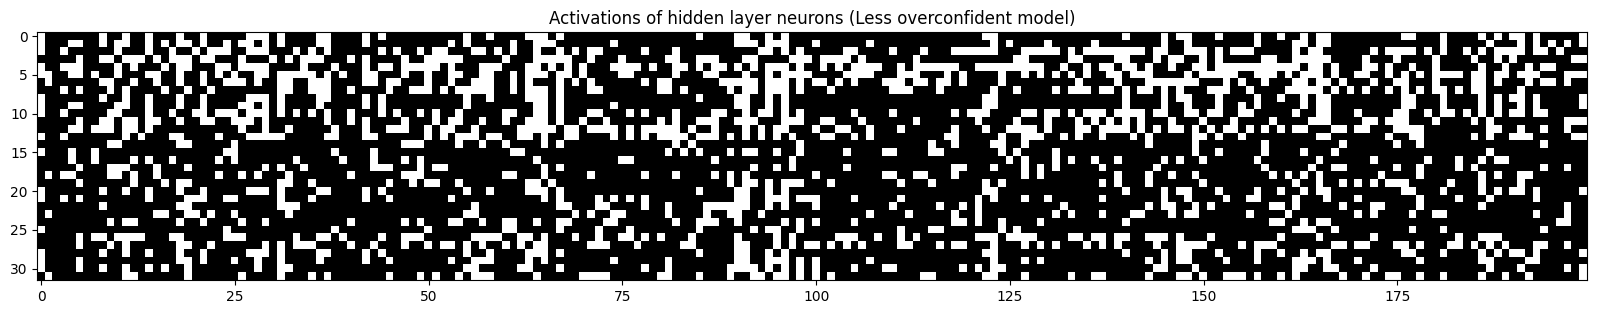

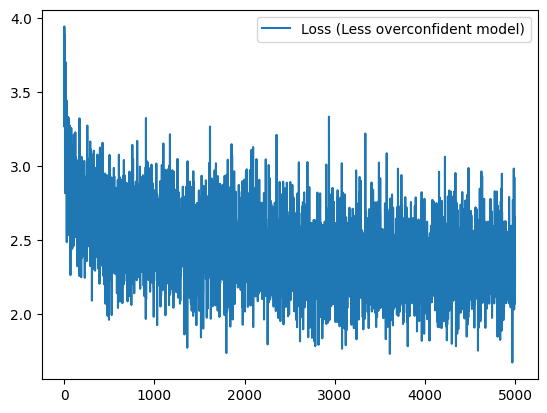

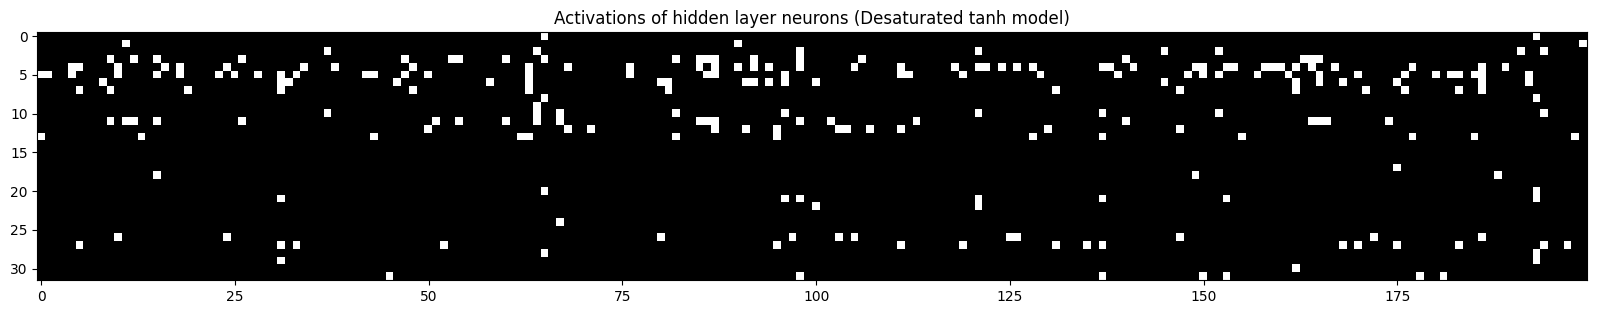

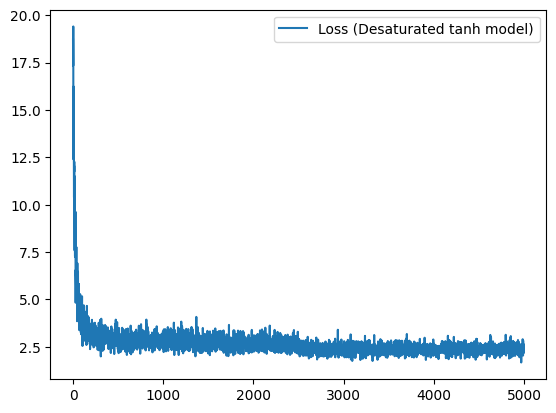

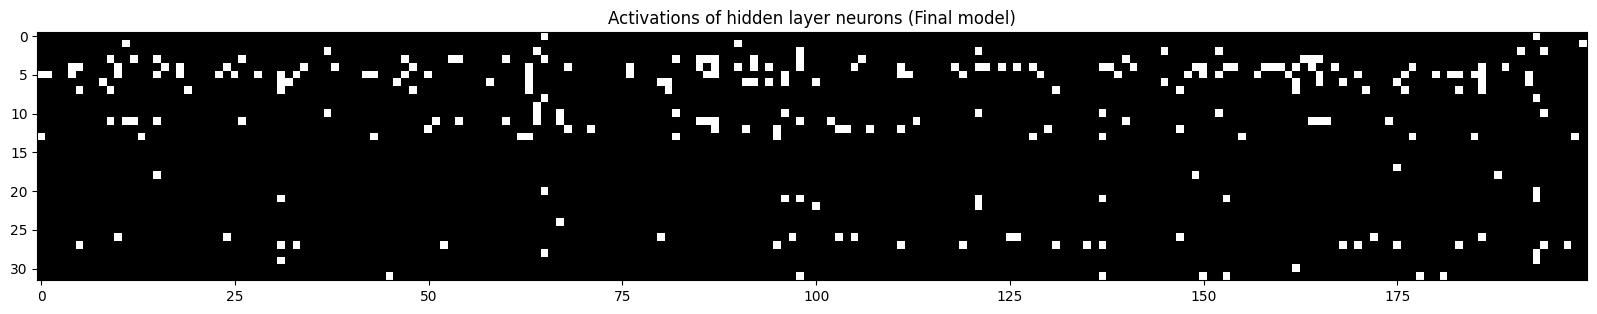

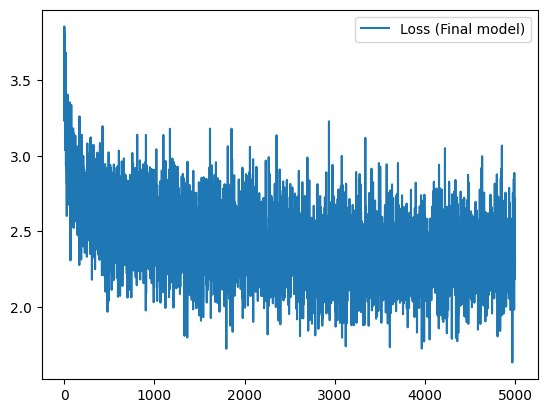

In [3]:
def evaluate_model(model, name, rounds=5000):
    print(f"Training {name}...")

    # Show some visualizations about our initial parameters.
    result = model.forward(td.X_test[:32])
    plt.figure(figsize=(20, 10))
    plt.imshow(result.CXW1.abs() > 0.999, cmap="gray", interpolation="nearest")
    plt.title(f"Activations of hidden layer neurons ({name})")

    # Show some visualizations about our parameters after training.
    model.train(rounds, silent=True)
    plt.figure()
    plt.plot(range(len(model.training_loss)), model.training_loss, label=f"Loss ({name})")
    plt.legend()

    print(f"{name} Loss after {rounds} rounds:", model.calc_loss_for_dataset(td.X_test, td.Y_test))

evaluate_model(MakemoreModel(use_kaiming_init=False, w2_scale=1, b2_scale=1), name="Initial model")

evaluate_model(MakemoreModel(use_kaiming_init=False, w2_scale=0.1, b2_scale=0), name="Less overconfident model")

evaluate_model(MakemoreModel(use_kaiming_init=True, w2_scale=1, b2_scale=1), name="Desaturated tanh model")

model = MakemoreModel(use_kaiming_init=True, w2_scale=0.1, b2_scale=0.0)

evaluate_model(model, name="Final model")



In [4]:
model.train(rounds=200_000)

print("Final loss over training set:", model.calc_loss_for_dataset(td.X_train, td.Y_train))
print("Final loss over dev set:", model.calc_loss_for_dataset(td.X_dev, td.Y_dev))

      0 /  200000 LR=0.10 minibatch loss: 1.9365
   1000 /  200000 LR=0.10 minibatch loss: 2.3191
   2000 /  200000 LR=0.10 minibatch loss: 2.2232
   3000 /  200000 LR=0.10 minibatch loss: 2.2615
   4000 /  200000 LR=0.10 minibatch loss: 2.1573
   5000 /  200000 LR=0.10 minibatch loss: 2.4795
   6000 /  200000 LR=0.10 minibatch loss: 2.3996
   7000 /  200000 LR=0.10 minibatch loss: 1.8550
   8000 /  200000 LR=0.10 minibatch loss: 2.4004
   9000 /  200000 LR=0.10 minibatch loss: 2.0939
  10000 /  200000 LR=0.10 minibatch loss: 1.9117
  11000 /  200000 LR=0.10 minibatch loss: 2.2912
  12000 /  200000 LR=0.10 minibatch loss: 2.1848
  13000 /  200000 LR=0.10 minibatch loss: 2.2330
  14000 /  200000 LR=0.10 minibatch loss: 1.9835
  15000 /  200000 LR=0.10 minibatch loss: 2.1840
  16000 /  200000 LR=0.10 minibatch loss: 1.8746
  17000 /  200000 LR=0.10 minibatch loss: 2.2900
  18000 /  200000 LR=0.10 minibatch loss: 2.2537
  19000 /  200000 LR=0.10 minibatch loss: 2.2283
  20000 /  200000 LR

In [5]:
for _ in range(10):
    print(model.predict())


saranelle
alices
ousha
emarlinn
herlee
dazsia
nicley
rnan
ezie
genne


In [6]:
for _ in range(10): print(model.predict('atu'))

atus
atui
atus
atuit
atuinly
atulend
atusha
aturynns
atulo
atulmee


(array([1819.,  368.,  276.,  336.,  324.,  320.,  303.,  350.,  355.,
        1949.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

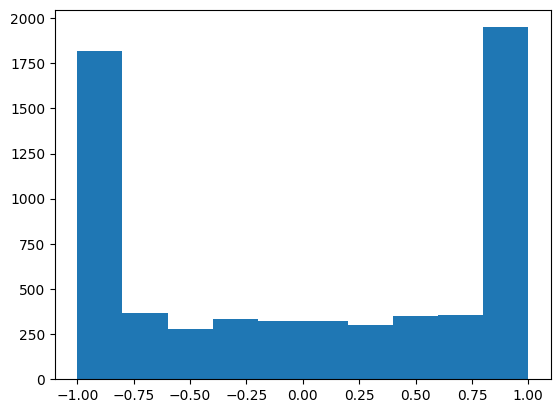

In [7]:
from lecture3.training_data import X_train

result = model.forward(X_train[:32])

plt.hist(result.CXW1.view(-1).tolist())

(array([  2.,  13.,  14.,  80., 156., 252., 206.,  90.,  42.,   9.]),
 array([-8.19968319, -6.73629627, -5.27290936, -3.80952244, -2.34613552,
        -0.8827486 ,  0.58063831,  2.04402523,  3.50741215,  4.97079906,
         6.43418598]),
 <BarContainer object of 10 artists>)

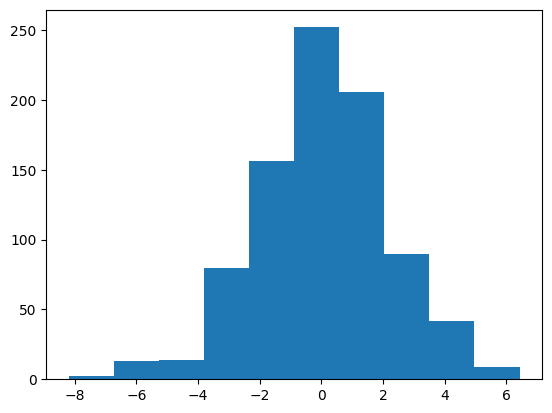

In [8]:
plt.hist(result.logits.view(-1).tolist())

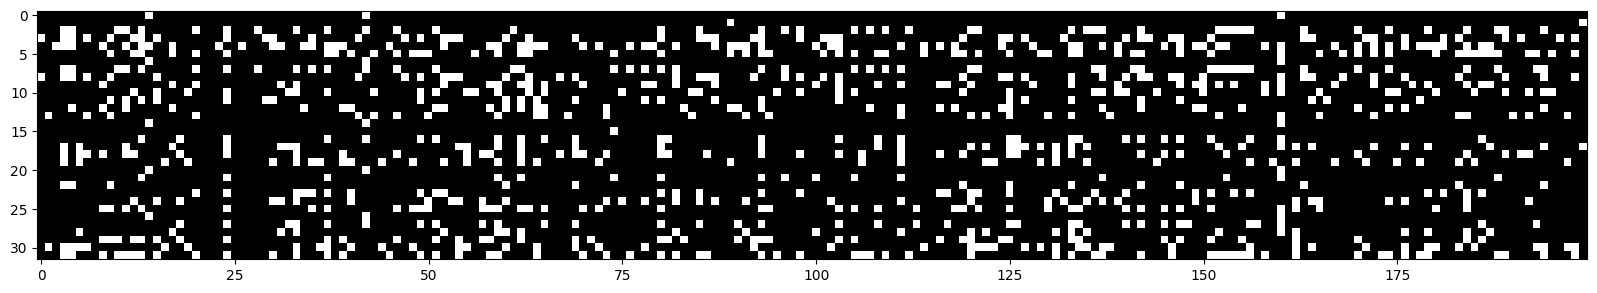

In [9]:
plt.figure(figsize=(20, 10))
plt.imshow(result.CXW1.abs() > 0.999, cmap="gray", interpolation="nearest")